## ПЗ 5. 

In [1]:
import pandas as pd
import numpy as np
import math

In [2]:
from __future__ import print_function

from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
def create_dataset( dataset, look_back=1 ):
    input_dataset = []
    output_dataset = []
    for i in range(len(dataset) - look_back):
        input_dataset.append(dataset[i:i+look_back, 0])
        output_dataset.append(dataset[i+look_back, 0])
    return np.array(input_dataset), np.array(output_dataset)

Разделение набора данных 96 учебных примеров и 48 примеров тестирования
Epoch 1/20
95/95 - 19s - loss: 0.0489
Epoch 2/20
95/95 - 0s - loss: 0.0245
Epoch 3/20
95/95 - 0s - loss: 0.0174
Epoch 4/20
95/95 - 0s - loss: 0.0158
Epoch 5/20
95/95 - 0s - loss: 0.0147
Epoch 6/20
95/95 - 0s - loss: 0.0137
Epoch 7/20
95/95 - 0s - loss: 0.0128
Epoch 8/20
95/95 - 0s - loss: 0.0119
Epoch 9/20
95/95 - 0s - loss: 0.0108
Epoch 10/20
95/95 - 0s - loss: 0.0099
Epoch 11/20
95/95 - 0s - loss: 0.0090
Epoch 12/20
95/95 - 0s - loss: 0.0080
Epoch 13/20
95/95 - 0s - loss: 0.0070
Epoch 14/20
95/95 - 0s - loss: 0.0061
Epoch 15/20
95/95 - 0s - loss: 0.0051
Epoch 16/20
95/95 - 0s - loss: 0.0044
Epoch 17/20
95/95 - 0s - loss: 0.0037
Epoch 18/20
95/95 - 0s - loss: 0.0031
Epoch 19/20
95/95 - 0s - loss: 0.0028
Epoch 20/20
95/95 - 0s - loss: 0.0024
Train Score: 24.61
Test Score: 56.79


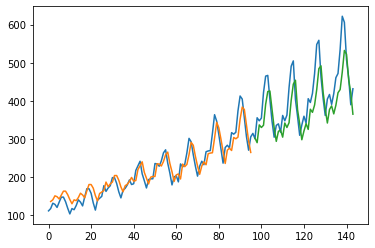

In [4]:
dataframe = pd.read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[:train_size], dataset[train_size:]
print(f'Разделение набора данных {train_size} учебных примеров и {test_size} примеров тестирования')

look_back = 1
train_input, train_output = create_dataset(train, look_back)
test_input, test_output = create_dataset(test, look_back)

train_input = train_input.reshape(train_input.shape[0], 1, train_input.shape[1])
test_input = test_input.reshape(test_input.shape[0], 1, test_input.shape[1])

model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(train_input, train_output, epochs=20, batch_size=1, verbose=2)

train_predict = model.predict(train_input)
test_predict = model.predict(test_input)

train_predict = scaler.inverse_transform(train_predict)
train_output = scaler.inverse_transform([train_output])
test_predict = scaler.inverse_transform(test_predict)
test_output = scaler.inverse_transform([test_output])

train_score = math.sqrt(mean_squared_error(train_output[0], train_predict[:,0]))
test_score = math.sqrt(mean_squared_error(test_output[0], test_predict[:,0]))

print(f'Train Score: {train_score:.2f}')
print(f'Test Score: {test_score:.2f}')

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:,:] = np.nan
train_predict_plot[look_back:look_back+len(train_predict),:] = train_predict

test_predict_plot = np.empty_like(dataset)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predict)+look_back*2:len(dataset),:] = test_predict

plt.plot(scaler.inverse_transform(dataset))
plt.plot(train_predict_plot)
plt.plot(test_predict_plot)
plt.show()

### Изучил еще один пример (из документации) - прогнозирования температуры воздуха на основе одномерных временных рядов.

In [5]:
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [6]:
# Набор метеорологических данных

zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True
)
csv_path, _ = os.path.splitext(zip_path)

In [7]:
df = pd.read_csv(csv_path)
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [8]:
# Аргумент history_size — это размер последнего временного интервала, 
# target_size – это целевой вектор, который необходимо спрогнозировать.

def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i+target_size])
    return np.array(data), np.array(labels)

In [9]:
TRAIN_SPLIT = 300000

In [10]:
# Извлекаем только температуру из набора данных.

uni_data = df['T (degC)']
uni_data.index = df['Date Time']
uni_data.head()

Date Time
01.01.2009 00:10:00   -8.02
01.01.2009 00:20:00   -8.41
01.01.2009 00:30:00   -8.51
01.01.2009 00:40:00   -8.31
01.01.2009 00:50:00   -8.27
Name: T (degC), dtype: float64

array([<AxesSubplot:xlabel='Date Time'>], dtype=object)

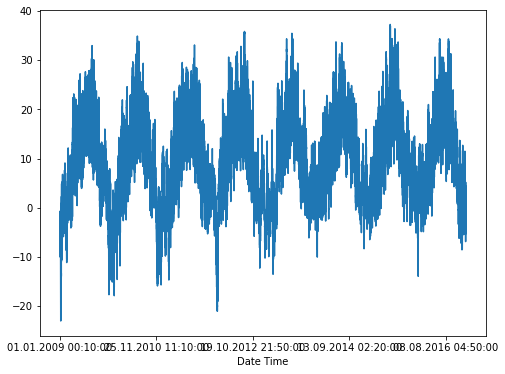

In [11]:
uni_data.plot(subplots=True)

In [12]:
uni_data = uni_data.values

In [13]:
# Выполним стандартизацию данных.
# Cтандартизация должна выполняться только c использованием обучающих данных.

uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
uni_train_std = uni_data[:TRAIN_SPLIT].std()

uni_data = (uni_data-uni_train_mean)/uni_train_std

In [14]:
"""На вход в модель будут подаваться последние 20 зарегистрированных наблюдений за температурой, 
и модель необходимо обучить прогнозировать температуру на следующем шаге по времени.
"""

univariate_past_history = 20
univariate_future_target = 0

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target
                                          )

x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target
                                      )

In [15]:
print ('Single window of past history')
print (x_train_uni[0])
print ('\n Target temperature to predict')
print (y_train_uni[0])

Single window of past history
[[-1.99766294]
 [-2.04281897]
 [-2.05439744]
 [-2.0312405 ]
 [-2.02660912]
 [-2.00113649]
 [-1.95134907]
 [-1.95134907]
 [-1.98492663]
 [-2.04513467]
 [-2.08334362]
 [-2.09723778]
 [-2.09376424]
 [-2.09144854]
 [-2.07176515]
 [-2.07176515]
 [-2.07639653]
 [-2.08913285]
 [-2.09260639]
 [-2.10418486]]

 Target temperature to predict
-2.1041848598100876


In [16]:
def create_time_steps(length):
    return list(range(-length, 0))

In [17]:
def show_plot(plot_data, delta, title):
    labels = ['История', 'Истинное будущее значение', 'Прогноз модели']
    marker = ['.-', 'rx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10,
                   label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Временной интервал')
    return plt

<module 'matplotlib.pyplot' from '/home/nicolay/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

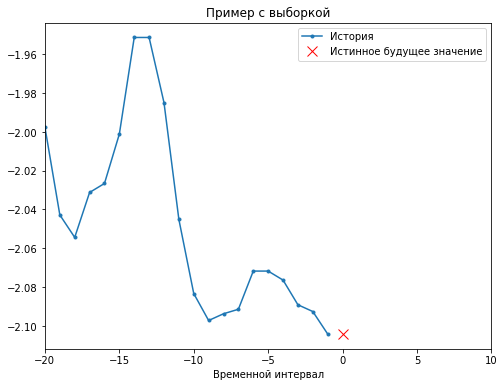

In [18]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Пример с выборкой')

### Базовое решение (без привлечения машинного обучения)

In [19]:
def baseline(history):
    return np.mean(history)

<module 'matplotlib.pyplot' from '/home/nicolay/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

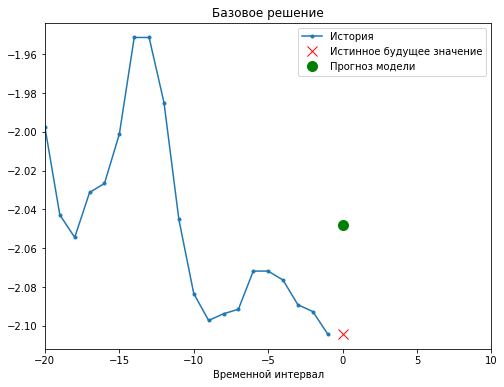

In [20]:
show_plot([x_train_uni[0], y_train_uni[0], baseline(x_train_uni[0])], 0,
           'Базовое решение')

### Рекуррентная нейронная сеть (LSTM)

In [21]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

In [22]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=x_train_uni.shape[-2:]),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')

In [23]:
for x, y in val_univariate.take(1):
    print(simple_lstm_model.predict(x).shape)

(256, 1)


In [24]:
EVALUATION_INTERVAL = 200
EPOCHS = 10

simple_lstm_model.fit(
    train_univariate, 
    epochs=EPOCHS, 
    steps_per_epoch=EVALUATION_INTERVAL, 
    validation_data=val_univariate, 
    validation_steps=50
)

Epoch 1/10
200/200 [==============================] - 5s 20ms/step - loss: 0.2637 - val_loss: 0.0493
Epoch 2/10
200/200 [==============================] - 3s 16ms/step - loss: 0.0635 - val_loss: 0.0294
Epoch 3/10
200/200 [==============================] - 3s 16ms/step - loss: 0.0398 - val_loss: 0.0264
Epoch 4/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0372 - val_loss: 0.0239
Epoch 5/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0264 - val_loss: 0.0221
Epoch 6/10
200/200 [==============================] - 3s 16ms/step - loss: 0.0290 - val_loss: 0.0208
Epoch 7/10
200/200 [==============================] - 3s 15ms/step - loss: 0.0259 - val_loss: 0.0197
Epoch 8/10
200/200 [==============================] - 3s 14ms/step - loss: 0.0242 - val_loss: 0.0181
Epoch 9/10
200/200 [==============================] - 3s 17ms/step - loss: 0.0233 - val_loss: 0.0170
Epoch 10/10
200/200 [==============================] - 3s 14ms/step - loss: 0.0214 - val_lo

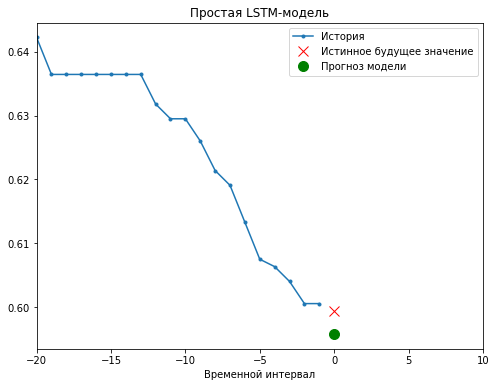

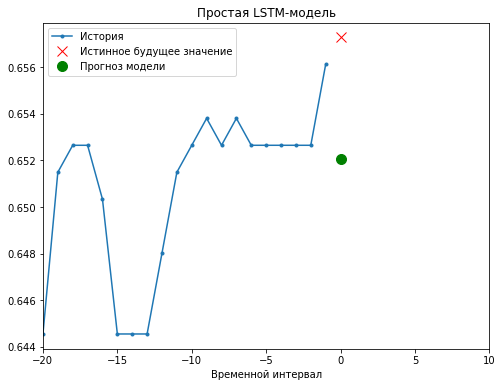

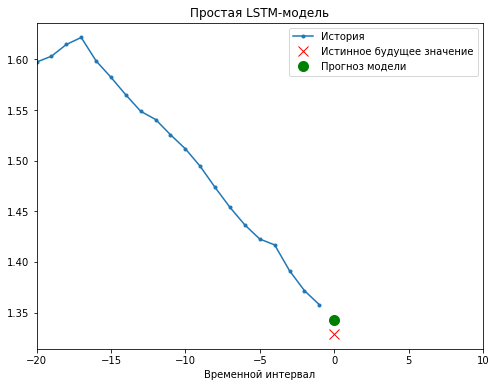

In [25]:
for x, y in val_univariate.take(3):
    plot = show_plot(
                    [x[0].numpy(), y[0].numpy(),
                    simple_lstm_model.predict(x)[0]], 0, 'Простая LSTM-модель'
                    )
    plot.show()

### Выглядит лучше, чем базовое решение.